In [ ]:
hex_ids = ["0x0239", "0x040B", "0x0575", "0x0643", "0x0760", "0x09AF", "0x0F42", "0x1048", "0x10C9", "0x1284", "0x1714", "0x1858", "0x1AC6", "0x22C6", "0x23A7", "0x240F", "0x2A38", "0x2A56", "0x2FC7", "0x3060", "0x35C3", "0x3812", "0x3B68", "0x409B", "0x41B2", "0x429B", "0x4724", "0x48C1", "0x4A32", "0x4BF8", "0x53AF", "0x53D7", "0x5B30", "0x5DA9", "0x5F01", "0x6060", "0x616A", "0x850E", "0x8F63", "0x93AC", "0x9591", "0x96F7", "0x9BF5", "0xA2DA", "0xA7B2", "0xA960", "0xB744", "0xB8AD", "0xBC16", "0xBCA3", "0xBDF1", "0xBF36", "0xC248", "0xC4B2", "0xC766", "0xCBD6", "0xCE97", "0xD326", "0xDA80", "0xE605", "0xF43F", "0xF5A4"]


In [2]:
#These have more difficult solutions

hex_ids = ["0x0239", "0x040B", "0x0643", "0x0760", "0x09AF", "0x0F42", "0x1048",
           "0x1284", "0x1714", "0x1AC6", "0x22C6", "0x240F",
           "0x2A38", "0x2A56", "0x2FC7", "0x3060", "0x35C3", "0x3812", "0x3B68", "0x409B",
           "0x41B2", "0x4724", "0x4BF8", "0x53AF", "0x53D7",
           "0x5DA9", "0x616A", "0x93AC",
           "0x9591", "0x96F7", "0x9BF5", "0xA960", "0xB744", "0xB8AD",
           "0xBC16", "0xBCA3", "0xBDF1", "0xC248", "0xC4B2", "0xC766", "0xCBD6",
           "0xCE97", "0xD326", "0xDA80", "0xE605", "0xF43F", "0xF5A4"]


In [9]:
len(hex_ids)

62

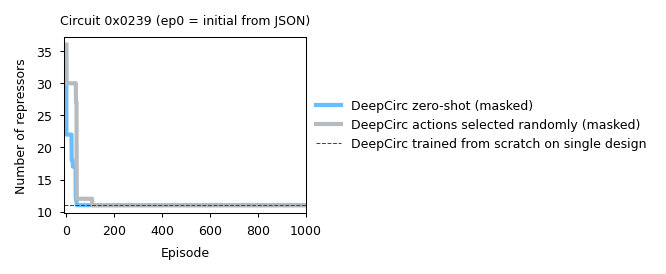

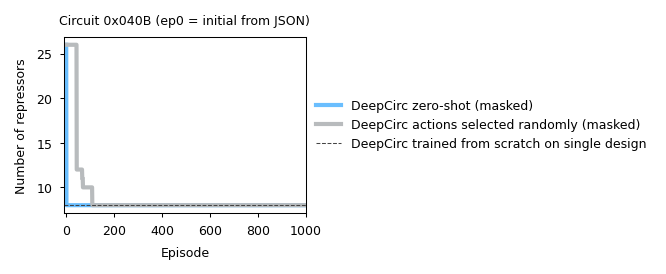

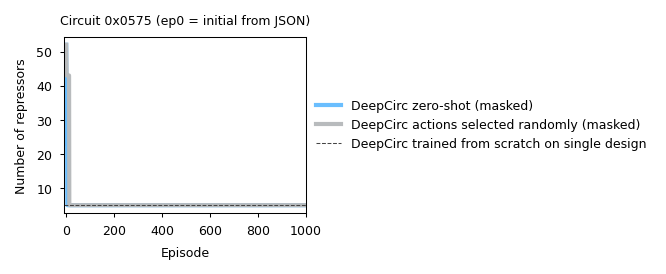

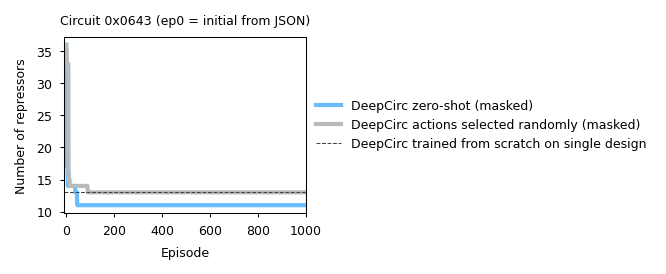

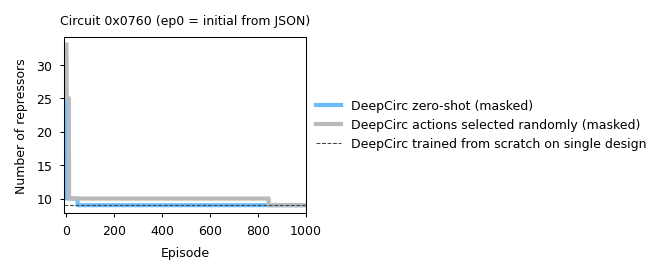

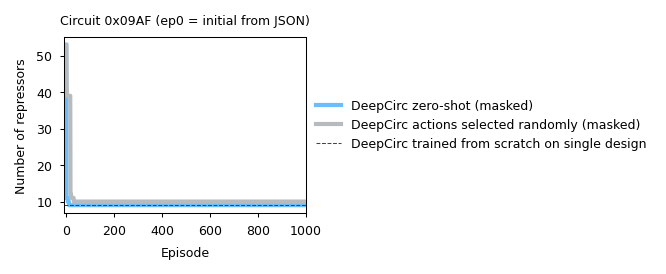

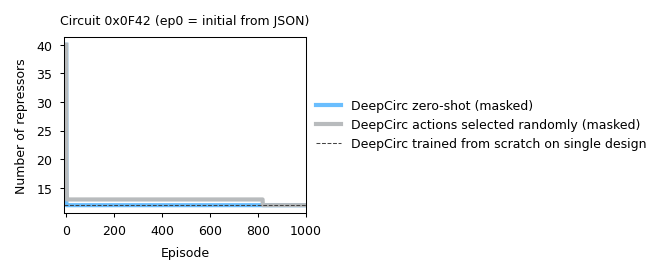

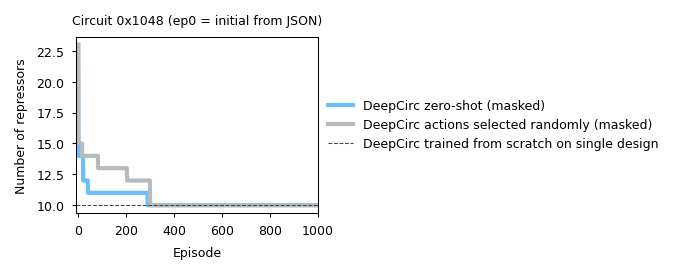

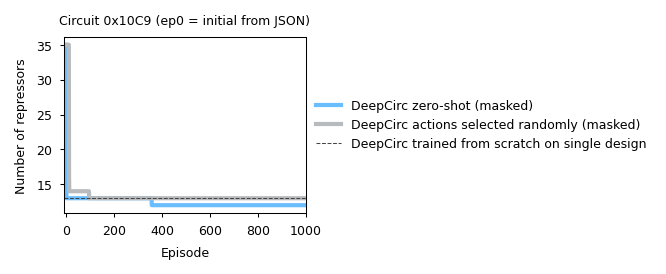

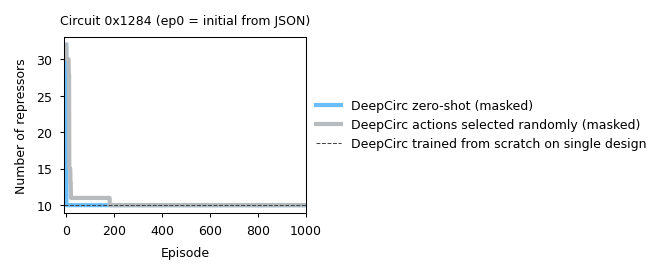

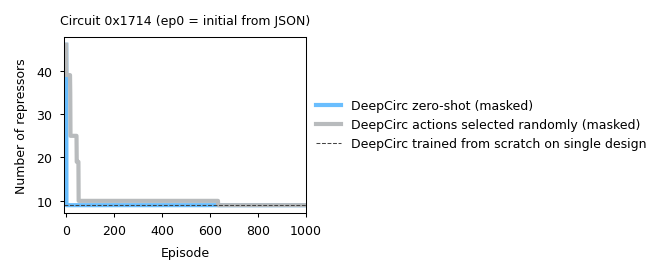

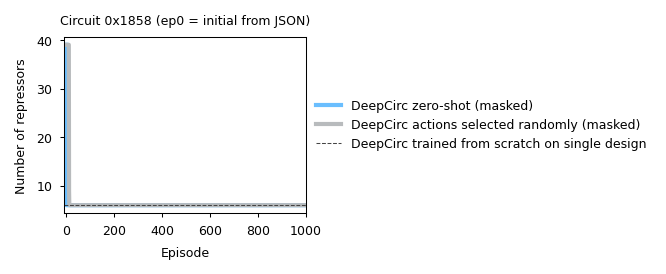

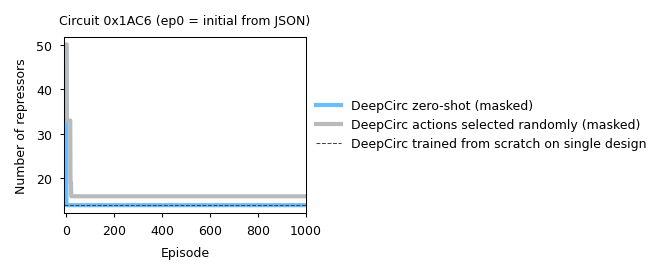

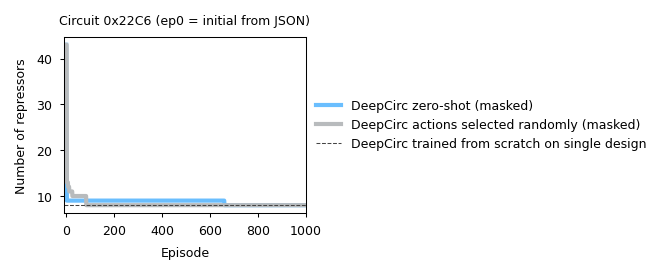

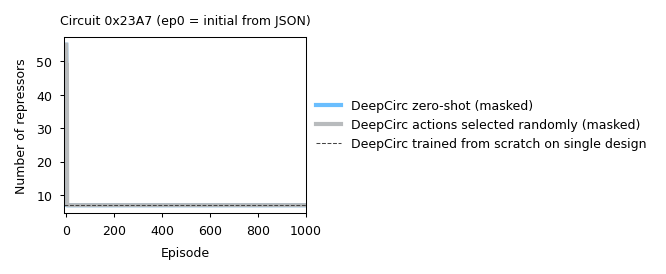

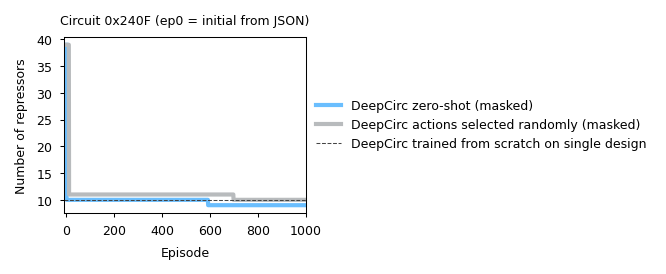

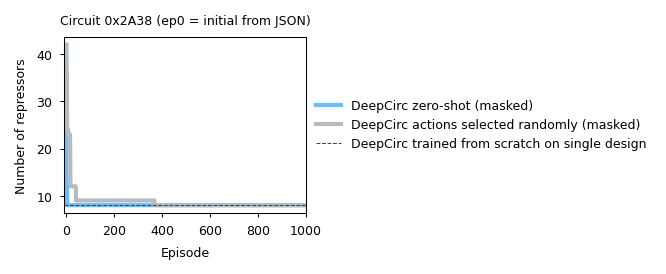

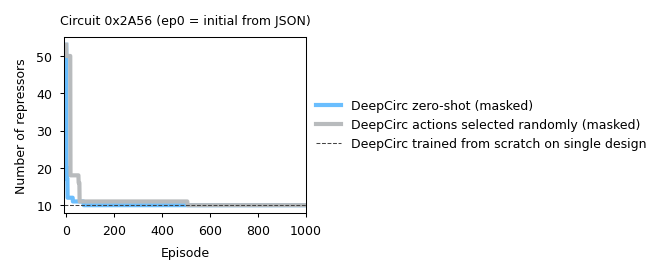

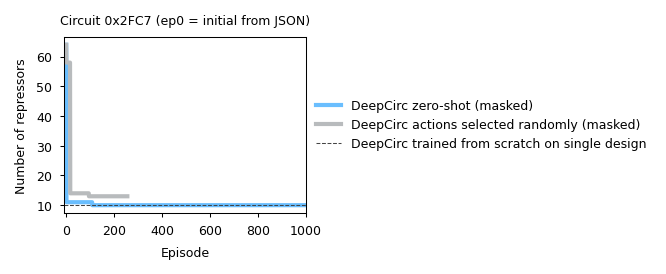

[0x3060] No episode_metrics CSVs were found with the expected structure or column names.
[0x35C3] No episode_metrics CSVs were found with the expected structure or column names.
[0x3812] No episode_metrics CSVs were found with the expected structure or column names.
[0x3B68] No episode_metrics CSVs were found with the expected structure or column names.
[0x409B] No episode_metrics CSVs were found with the expected structure or column names.
[0x41B2] No episode_metrics CSVs were found with the expected structure or column names.
[0x429B] No episode_metrics CSVs were found with the expected structure or column names.
[0x4724] No episode_metrics CSVs were found with the expected structure or column names.
[0x48C1] No episode_metrics CSVs were found with the expected structure or column names.
[0x4A32] No episode_metrics CSVs were found with the expected structure or column names.
[0x4BF8] No episode_metrics CSVs were found with the expected structure or column names.
[0x53AF] No episode_m

/tmp/ipykernel_1233881/1258096893.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(pt_to_in(150), pt_to_in(110)), dpi=150)


[0x9591] No episode_metrics CSVs were found with the expected structure or column names.
[0x96F7] No episode_metrics CSVs were found with the expected structure or column names.
[0x9BF5] No episode_metrics CSVs were found with the expected structure or column names.
[0xA2DA] No episode_metrics CSVs were found with the expected structure or column names.
[0xA7B2] No episode_metrics CSVs were found with the expected structure or column names.
[0xA960] No episode_metrics CSVs were found with the expected structure or column names.
[0xB744] No episode_metrics CSVs were found with the expected structure or column names.
[0xB8AD] No episode_metrics CSVs were found with the expected structure or column names.
[0xBC16] No episode_metrics CSVs were found with the expected structure or column names.
[0xBCA3] No episode_metrics CSVs were found with the expected structure or column names.
[0xBDF1] No episode_metrics CSVs were found with the expected structure or column names.
[0xBF36] No episode_m

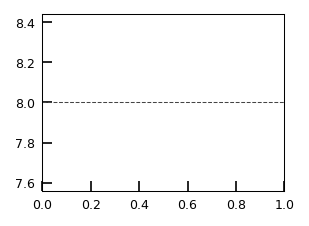

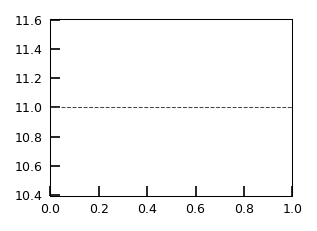

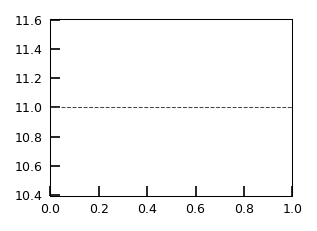

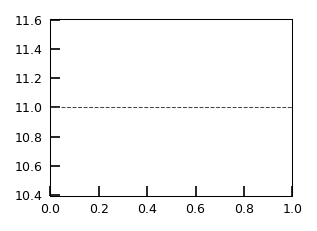

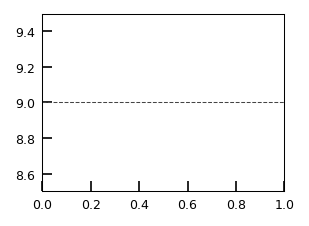

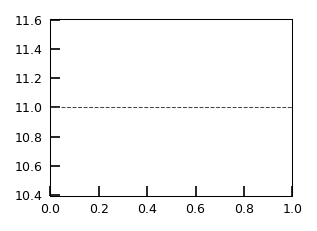

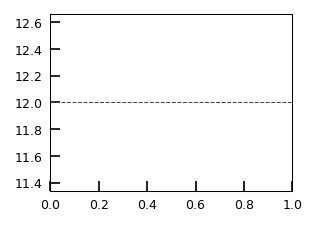

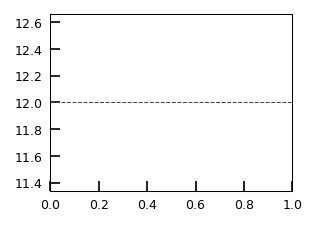

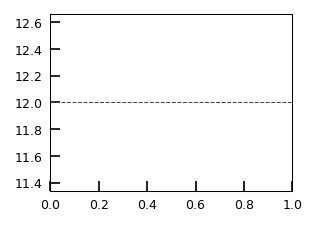

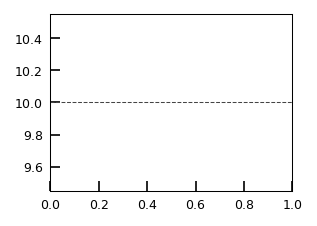

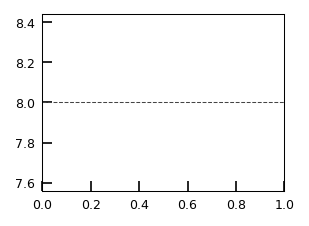

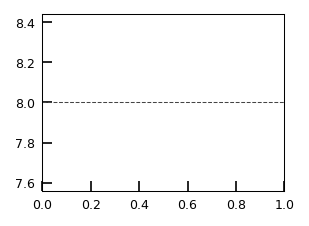

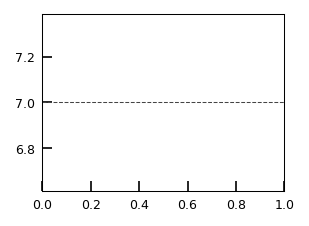

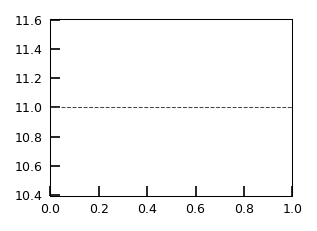

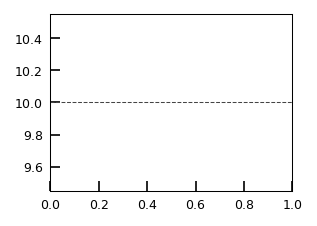

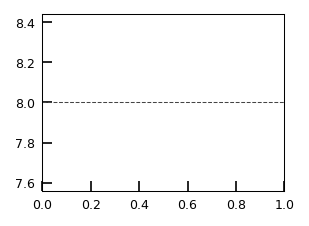

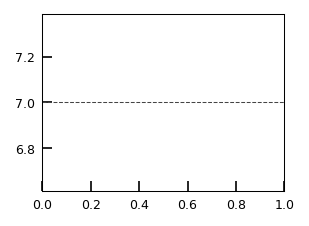

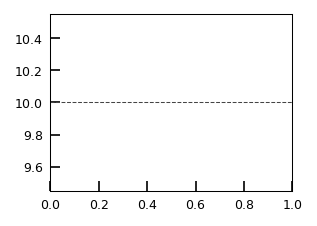

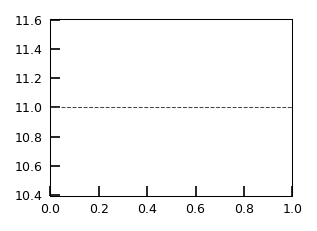

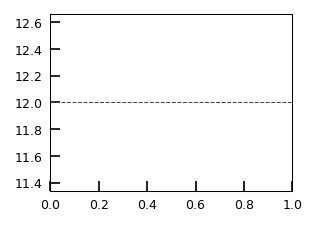

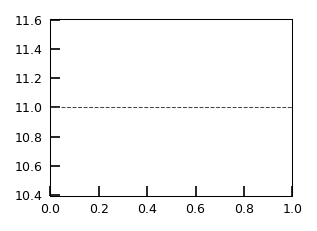

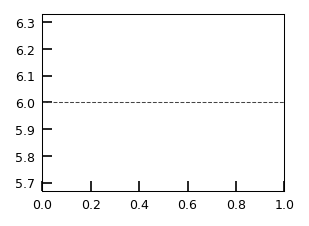

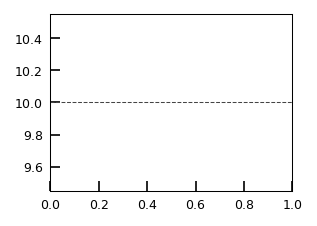

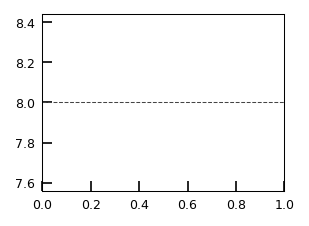

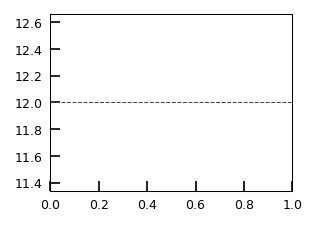

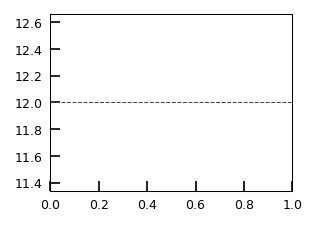

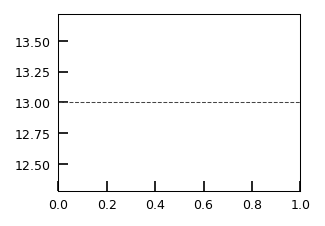

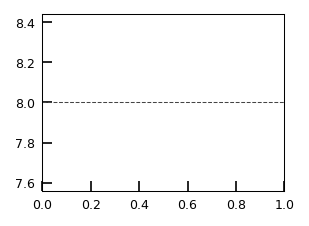

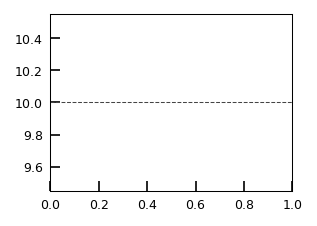

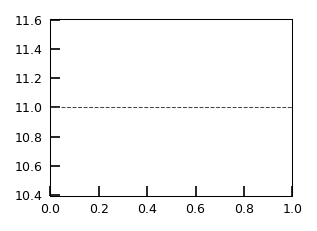

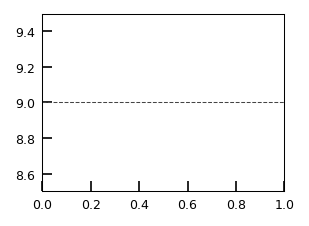

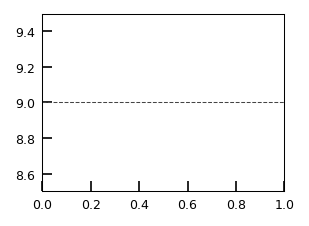

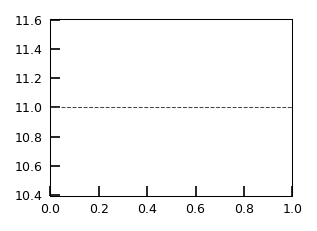

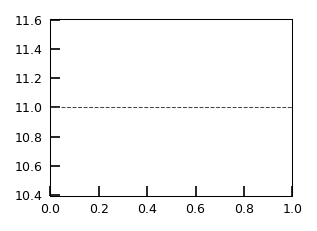

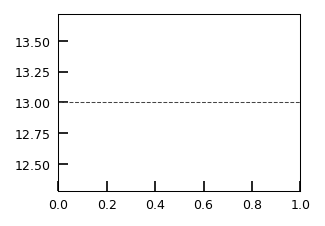

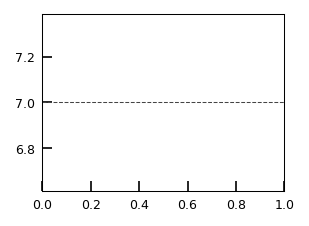

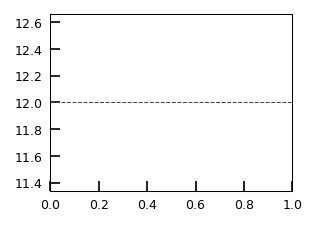

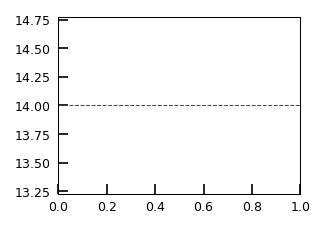

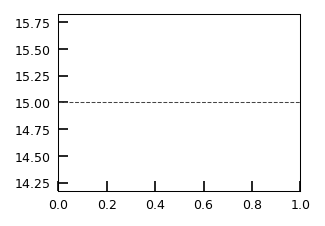

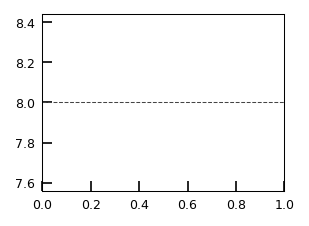

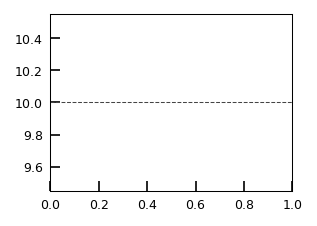

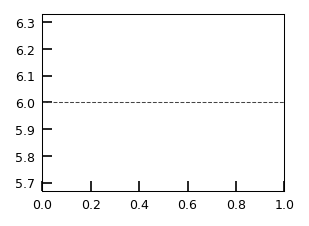

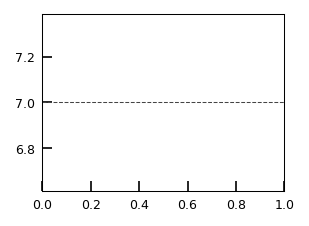

In [14]:
# Loads each method's episode_metrics.csv from search_root and plots
# best_energy_so_far vs episode, with GraphPad-style Matplotlib formatting.
# Adds a dashed line at the spreadsheet's "smallest_ML_size".
#
# Episode 0 comes from trajectories/ep_0000.json (steps[0].energy)
# and is used for ALL methods' curves.

import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker

# ---------------- GraphPad-style Matplotlib settings ----------------
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "font.size": 6,
    "axes.labelsize": 6,
    "axes.titlesize": 6,
    "axes.linewidth": 0.5,
    "lines.linewidth": 0.5,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "legend.fontsize": 6,
    "legend.frameon": False,
    "savefig.dpi": 300,
    "figure.dpi": 100,
    "figure.figsize": (8, 4),
    "axes.grid": False,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "pdf.use14corefonts": False,
    "svg.fonttype": "none",
})
pt_to_in = lambda pt: pt / 72

# ---------- load the spreadsheet once ----------
sheet_path = Path("/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/scripts/runs/Fig. 2 Sizes of random 4 input circuits plus hex verification and validation (trained from scratch and automated analysis for zero-shot comparison).csv")

def _norm_hex(x):
    s = str(x).strip().lower()
    if not s.startswith("0x"):
        s = "0x" + s
    return "0x" + s[2:].upper()  # e.g., '0x0239', '0xA7B2'

sizes_df = pd.read_csv(sheet_path, dtype={"circuit_hex": str})
sizes_df["circuit_hex_norm"] = sizes_df["circuit_hex"].map(_norm_hex)
sizes_df["smallest_ML_size"] = pd.to_numeric(sizes_df["smallest_ML_size"], errors="coerce")

# fast lookup: circuit_hex -> smallest_ML_size
size_lookup = dict(zip(sizes_df["circuit_hex_norm"], sizes_df["smallest_ML_size"]))

# ---------- helpers ----------
def find_initial_energy(search_root):
    """
    Locate a trajectories/ep_0000.json and return steps[0].energy as float.
    Priority: trained_masked > random_masked > untrained_masked > any trajectories.
    """
    patterns = [
        "**/trained_masked/trajectories/ep_0000.json",
        "**/random_masked/trajectories/ep_0000.json",
        "**/untrained_masked/trajectories/ep_0000.json",
        "**/trajectories/ep_0000.json",
    ]
    for pat in patterns:
        matches = sorted(search_root.glob(pat))
        if matches:
            try:
                with open(matches[0]) as f:
                    data = json.load(f)
                return float(data["steps"][0]["energy"])
            except Exception as e:
                print(f"Failed reading initial energy from {matches[0]}: {e}")
                return None
    return None

# ---------- plotting ----------
#hex_ids = [...]
#hex_ids = ["0x1048"]

color_map = {
    "random":   "#b8bbbd",
    "trained":  "#6abefe",
    "untrained":"#70da70",
}

for hex_id in hex_ids:
    #search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_MLP_with_scalars/4_inputs_{hex_id}_samplingfactor_3_4000nn")
    search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_MLP_with_scalars_1000_episodes_test/4_inputs_{hex_id}_samplingfactor_3_4000nn")


    label_map = {
        "random": "DeepCirc actions selected randomly (masked)",
        "trained": "DeepCirc zero-shot (masked)",
        "untrained": "Untrained (masked)",
    }

    method_keys = ["trained", "random", "untrained"]

    patterns = {
        "random":   ["**/random_masked/trajectories/*episode_metrics.csv", "**/*random*episode_metrics.csv"],
        "trained":  ["**/trained_masked/trajectories/*episode_metrics.csv", "**/*trained*episode_metrics.csv"],
        "untrained":["**/untrained_masked/trajectories/*episode_metrics.csv", "**/*untrained*episode_metrics.csv"],
    }

    # episode 0 energy from JSON (shared across methods)
    initial_energy = find_initial_energy(search_root)

    found = {}
    for m in method_keys:
        for pat in patterns[m]:
            matches = sorted(set(p.as_posix() for p in search_root.glob(pat)))
            if matches:
                found[m] = matches[0]
                break

    example_csv = search_root / "random_episode_metrics.csv"
    if "random" not in found and example_csv.exists():
        found["random"] = example_csv.as_posix()

    # Per-figure size to match example styling
    fig, ax = plt.subplots(figsize=(pt_to_in(150), pt_to_in(110)), dpi=150)
    loaded_any = False
    max_ep = 0  # track max episode to force a final tick+label

    for m in method_keys:
        if m not in found:
            continue
        csv_path = Path(found[m])
        try:
            df = pd.read_csv(csv_path)
            if {"episode", "best_energy_so_far"}.issubset(df.columns):
                df = df.sort_values("episode")

                # Use episodes as-is (no +1 shift)
                x = df["episode"].to_numpy()
                y = df["best_energy_so_far"].to_numpy(dtype=float)

                # Ensure an episode 0 point exists & equals the initial energy from JSON
                if initial_energy is not None:
                    if (x == 0).any():
                        y[x == 0] = initial_energy
                    else:
                        x = np.insert(x, 0, 0)
                        y = np.insert(y, 0, initial_energy)
                else:
                    if len(x) > 0 and x.min() > 0:
                        x = np.insert(x, 0, 0)
                        y = np.insert(y, 0, y[0])

                if len(x):
                    max_ep = max(max_ep, int(np.max(x)))

                ax.plot(
                    x,
                    y,
                    label=label_map.get(m, m),
                    color=color_map.get(m),
                    linestyle='-',
                    linewidth=2,
                )
                loaded_any = True
            else:
                print(f"Skipping {csv_path} — required columns not found: {df.columns.tolist()}")
        except Exception as e:
            print(f"Failed to load {csv_path}: {e}")

    # ----- horizontal dashed line from spreadsheet -----
    ml_size = size_lookup.get(_norm_hex(hex_id))
    if pd.notna(ml_size):
        ax.axhline(
            y=float(ml_size),
            linestyle="--",
            linewidth=0.5,
            color="#444444",
            label="DeepCirc trained from scratch on single design",
        )

    if loaded_any:
        # GraphPad-style aesthetics for axes and ticks
        for spine in ax.spines.values():
            spine.set_linewidth(0.5)

        # Force a final tick at a clean multiple near max episode
        base = 200  # choose tick spacing you prefer
        right_limit = int(np.ceil(max_ep / base) * base) if max_ep > 0 else base
        ax.xaxis.set_major_locator(mticker.MultipleLocator(base))
        ax.set_xlim(-10, right_limit)
        #ax.set_xlim(-1, 200)

        # Small margin to keep the last tick label visible
        ax.margins(x=0.02)

        ax.tick_params(axis='both', which='both', direction='out', length=2, width=0.5)

        ax.set_xlabel("Episode")
        ax.set_ylabel("Number of repressors")
        title_suffix = " (ep0 = initial from JSON)" if initial_energy is not None else ""
        ax.set_title(f"Circuit {hex_id}{title_suffix}")

        # Legend outside to the right
        ax.legend(
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
            borderaxespad=0,
        )
        #plt.tight_layout(rect=[0, 0, 0.85, 1])

        #plt.tight_layout()
        plt.show()
    else:
        print(f"[{hex_id}] No episode_metrics CSVs were found with the expected structure or column names.")


Trained vs Random — counts: {'Win': 6, 'Loss': 0, 'Tie': 13} out of 19
Trained vs ML size — counts: {'Win': 3, 'Loss': 0, 'Tie': 16} out of 19
Random vs ML size  — counts: {'Win': 0, 'Loss': 3, 'Tie': 16} out of 19


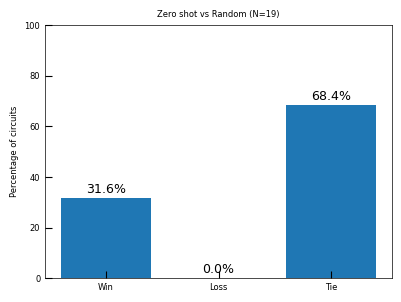

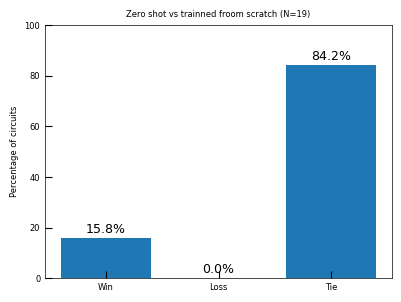

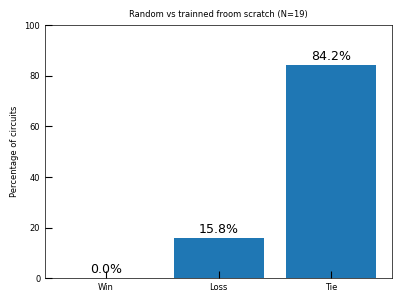

In [15]:
# ---------- helpers for stats ----------
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Spreadsheet path (same one you used above)
#sheet_path = Path("/mnt/data/Fig. 2 Sizes of random 4 input circuits plus hex verification and validation (trained from scratch and automated analysis for zero-shot comparison).csv")

def _norm_hex(x: str) -> str:
    s = str(x).strip().lower()
    if not s.startswith("0x"):
        s = "0x" + s
    return "0x" + s[2:].upper()

# Load sheet once and build lookup: circuit_hex -> smallest_ML_size
sizes_df = pd.read_csv(sheet_path, dtype={"circuit_hex": str})
sizes_df["circuit_hex_norm"] = sizes_df["circuit_hex"].map(_norm_hex)
sizes_df["smallest_ML_size"] = pd.to_numeric(sizes_df["smallest_ML_size"], errors="coerce")
size_lookup = dict(zip(sizes_df["circuit_hex_norm"], sizes_df["smallest_ML_size"]))

# Your hex_ids list should already exist
# hex_ids = [...]

patterns = {
    "random":   ["**/random_masked/trajectories/*episode_metrics.csv", "**/*random*episode_metrics.csv"],
    "trained":  ["**/trained_masked/trajectories/*episode_metrics.csv", "**/*trained*episode_metrics.csv"],
    "untrained":["**/untrained_masked/trajectories/*episode_metrics.csv", "**/*untrained*episode_metrics.csv"],
}

def find_csv(search_root, method):
    for pat in patterns[method]:
        matches = sorted(set(p.as_posix() for p in search_root.glob(pat)))
        if matches:
            return Path(matches[0])
    if method == "random":
        ex = search_root / "random_episode_metrics.csv"
        if ex.exists():
            return ex
    return None

def get_final_size(csv_path):
    try:
        df = pd.read_csv(csv_path)
        if {"episode", "best_energy_so_far"}.issubset(df.columns):
            df = df.sort_values("episode")
            return float(df["best_energy_so_far"].iloc[-1])
    except Exception as e:
        print(f"Failed to read {csv_path}: {e}")
    return None

# ---------- compute pairwise outcomes ----------
outcomes_tr_v_rand = {"Win": 0, "Loss": 0, "Tie": 0}
outcomes_tr_v_ml   = {"Win": 0, "Loss": 0, "Tie": 0}
outcomes_rand_v_ml = {"Win": 0, "Loss": 0, "Tie": 0}   # <— NEW

n_tr_v_rand = 0
n_tr_v_ml   = 0
n_rand_v_ml = 0  # <— NEW

for hex_id in hex_ids:
    
    #OLD GAT_no_scalars
    #search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/scripts/runs/Fig3_zero_shot_random_4_inputs_{hex_id}_samplingfactor_3_4000nn_v1/seed_1")
    
    #GAT_MLP_with_scalars
    #search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_MLP_with_scalars/4_inputs_{hex_id}_samplingfactor_3_4000nn")
    
    #GAT_with_scalars
    #search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_with_scalars/4_inputs_{hex_id}_samplingfactor_3_4000nn")

    #GAT_no_scalars
    #search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_no_scalars/4_inputs_{hex_id}_samplingfactor_3_4000nn")

    #1000 episodes test
    search_root = Path(f"/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/manuscript/zero-shot/GAT_MLP_with_scalars_1000_episodes_test/4_inputs_{hex_id}_samplingfactor_3_4000nn")



    p_tr = find_csv(search_root, "trained")
    p_ra = find_csv(search_root, "random")

    tr_final = get_final_size(p_tr) if p_tr else None
    ra_final = get_final_size(p_ra) if p_ra else None
    ml_val   = size_lookup.get(_norm_hex(hex_id))

    # trained vs random
    if tr_final is not None and ra_final is not None:
        n_tr_v_rand += 1
        if tr_final < ra_final:
            outcomes_tr_v_rand["Win"] += 1
        elif tr_final > ra_final:
            outcomes_tr_v_rand["Loss"] += 1
        else:
            outcomes_tr_v_rand["Tie"] += 1

    # trained vs ML
    if tr_final is not None and ml_val is not None and not np.isnan(ml_val):
        n_tr_v_ml += 1
        if tr_final < ml_val:
            outcomes_tr_v_ml["Win"] += 1
        elif tr_final > ml_val:
            outcomes_tr_v_ml["Loss"] += 1
        else:
            outcomes_tr_v_ml["Tie"] += 1

    # random vs ML  <— NEW
    if ra_final is not None and ml_val is not None and not np.isnan(ml_val):
        n_rand_v_ml += 1
        if ra_final < ml_val:
            outcomes_rand_v_ml["Win"] += 1
        elif ra_final > ml_val:
            outcomes_rand_v_ml["Loss"] += 1
        else:
            outcomes_rand_v_ml["Tie"] += 1

# ---------- convert to percentages ----------
def to_percentages(counts, denom):
    if denom == 0:
        return [0.0, 0.0, 0.0]
    return [
        100.0 * counts["Win"]/denom,
        100.0 * counts["Loss"]/denom,
        100.0 * counts["Tie"]/denom
    ]

cats = ["Win", "Loss", "Tie"]
pct_tr_v_rand = to_percentages(outcomes_tr_v_rand, n_tr_v_rand)
pct_tr_v_ml   = to_percentages(outcomes_tr_v_ml,   n_tr_v_ml)
pct_rand_v_ml = to_percentages(outcomes_rand_v_ml, n_rand_v_ml)  # <— NEW

print("Trained vs Random — counts:", outcomes_tr_v_rand, "out of", n_tr_v_rand)
print("Trained vs ML size — counts:", outcomes_tr_v_ml,   "out of", n_tr_v_ml)
print("Random vs ML size  — counts:", outcomes_rand_v_ml, "out of", n_rand_v_ml)  # <— NEW

# ----------------------------------------------------------
def plot_bars(categories, values, title):
    fig, ax = plt.subplots(figsize=(4, 3))
    bars = ax.bar(categories, values)
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage of circuits")
    ax.set_title(title)
    for rect, v in zip(bars, values):
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 1,
                f"{v:.1f}%", ha="center", va="bottom", fontsize=9)
    fig.tight_layout()
    plt.show()

plot_bars(cats, pct_tr_v_rand, f"Zero shot vs Random (N={n_tr_v_rand})")
plot_bars(cats, pct_tr_v_ml,   f"Zero shot vs trainned froom scratch (N={n_tr_v_ml})")
plot_bars(cats, pct_rand_v_ml, f"Random vs trainned froom scratch (N={n_rand_v_ml})")  